In [ ]:
Name : Ashutosh Waghire
TE-IT
DIV : I 
ROLL : 54

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import mul
import math

def compute_regcoef(x, y):
    n = len(x)
    sumxy = sum(list(map(mul, x, y)))
    sumx = sum(x)
    sumx2 = sum(i**2 for i in x)
    denom = n * sumx2 - sumx**2
    m = (n * sumxy - sumx * sum(y)) / denom
    c = (sum(y) - m * sumx) / n
    return c, m

In [26]:
def plot_regline(x, y, b):
    plt.scatter(x, y, color='b', marker='o', s=80)
    y_pred = np.float_(x) * b[1] + b[0]
    plt.plot(x, y_pred, color='g')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Line')
    plt.show()


intercept 0.0
slope 1.0


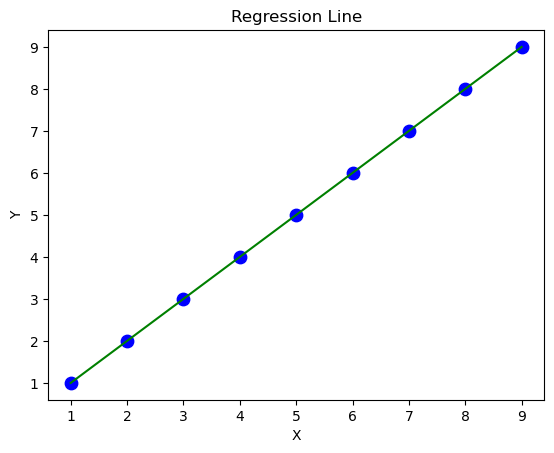

In [28]:
x = [1,2,3,4,5,6,7,8,9]
y = [1,2,3,4,5,6,7,8,9]

b = compute_regcoef(x,y)
type(b)
print ('intercept',b[0])
print('slope',b[1])
plot_regline(x,y,b)

In [ ]:
let's try it more time

intercept 0.6111111111111103
slope 1.1


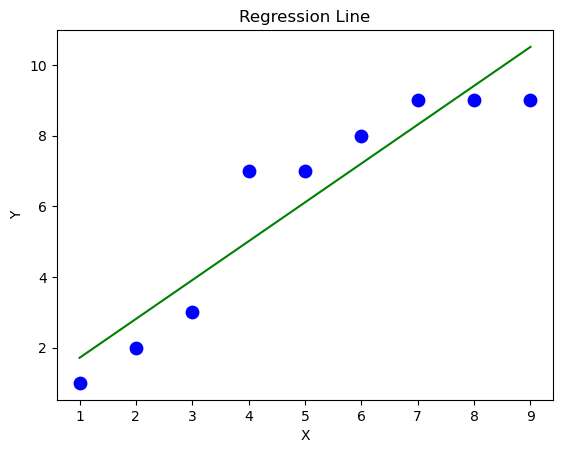

In [35]:
x = [1,2,3,4,5,6,7,8,9]
y = [1,2,3,7,7,8,9,9,9]

b = compute_regcoef(x,y)
type(b)
print ('intercept',b[0])
print ('slope',b[1])
plot_regline(x,y,b)
       

In [ ]:
we can clearly see the variation in Y values.may be regression is not good for more variability

In [42]:
df=pd.read_csv('weight-height.csv')
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [44]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [46]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

intercept [-350.73719181]
slope [7.71728764]


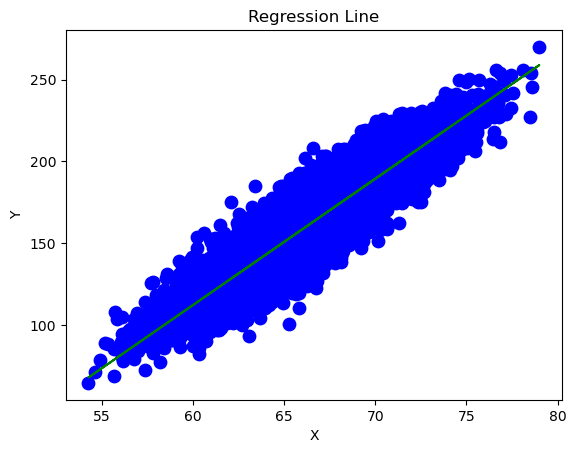

In [50]:
x = df.iloc[:,1:2] .values
y = df.iloc[:,2] .values
b = compute_regcoef(x,y)
type(b) 
print ('intercept',b[0])
print('slope',b[1])
plot_regline(x,y,b)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [56]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [58]:
m=regression.coef_
print('Regression Coefficeint / slope of regression line' ,m)

Regression Coefficeint / slope of regression line [7.71833809]


In [60]:
c = regression.intercept_
print('Intercept',c)

Intercept -350.8415809450645


In [62]:
y_pred = regression.predict(x_test)
print(y_pred)

[148.71918181 168.38777621 224.33647637 ... 177.05541851 152.24692441
 117.82424099]


In [64]:
df1 = pd.DataFrame({'Actual value':y_test.flatten(),'Predicted Value' :y_pred.flatten()})
df1

,Actual value,Predicted Value
0,138.085796,148.719182
1,187.363366,168.387776
2,216.533191,224.336476
3,131.761443,157.642640
4,157.718438,149.664097
...,...,...
2495,121.094631,149.597631
2496,207.493691,203.256212
2497,169.634399,177.055419
2498,169.459631,152.246924


In [66]:
x_test[0]*m+c

array([148.71918181])

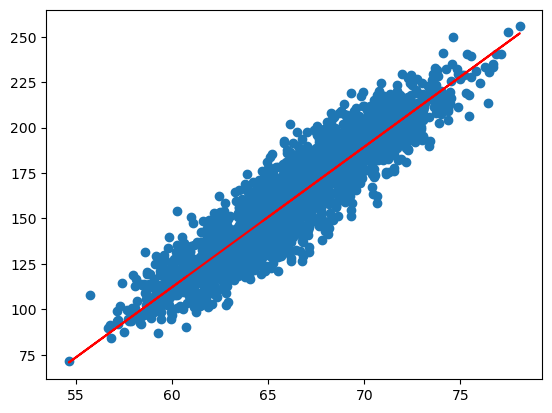

In [68]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.show()

In [70]:
from sklearn import metrics
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 9.81509183752961
Mean Squared Error 151.46996027337096
Root Mean squared error 12.307313284115708
